In [1]:
import pandas as pd
import datetime

In [2]:
import pvlib

data = pvlib.iotools.get_psm3(
    latitude=38.2544, 
    longitude=-104.6091, 
    api_key='input your api_key', 
    email='input your email', 
    names='tmy', 
    interval=60, 
    attributes=('air_temperature', 'dhi', 'dni', 'ghi', 'wind_speed'), 
    leap_day=False, 
    full_name='pvlib python', 
    affiliation='pvlib python', 
    timeout=60)

In [4]:
print(data)

({'Source': 'NSRDB', 'Location ID': '494117', 'City': '-', 'State': '-', 'Country': '-', 'Latitude': 38.25, 'Longitude': -104.62, 'Time Zone': -7, 'Elevation': 1446, 'Local Time Zone': -7, 'Dew Point Units': 'c', 'DHI Units': 'w/m2', 'DNI Units': 'w/m2', 'GHI Units': 'w/m2', 'Temperature Units': 'c', 'Pressure Units': 'mbar', 'Wind Direction Units': 'Degrees', 'Wind Speed': 'm/s', 'Surface Albedo Units': 'N/A', 'Version': '3.2.0'},                            Year  Month  Day  Hour  Minute  Temperature  \
2004-01-01 00:30:00-07:00  2004      1    1     0      30          0.0   
2004-01-01 01:30:00-07:00  2004      1    1     1      30          0.0   
2004-01-01 02:30:00-07:00  2004      1    1     2      30          0.0   
2004-01-01 03:30:00-07:00  2004      1    1     3      30          0.0   
2004-01-01 04:30:00-07:00  2004      1    1     4      30          0.0   
...                         ...    ...  ...   ...     ...          ...   
1999-12-31 19:30:00-07:00  1999     12   31   

In [7]:
print(df)

                           Year  Month  Day  Hour  Minute  Temperature  \
2004-01-01 00:30:00-07:00  2004      1    1     0      30          0.0   
2004-01-01 01:30:00-07:00  2004      1    1     1      30          0.0   
2004-01-01 02:30:00-07:00  2004      1    1     2      30          0.0   
2004-01-01 03:30:00-07:00  2004      1    1     3      30          0.0   
2004-01-01 04:30:00-07:00  2004      1    1     4      30          0.0   
...                         ...    ...  ...   ...     ...          ...   
1999-12-31 19:30:00-07:00  1999     12   31    19      30          2.0   
1999-12-31 20:30:00-07:00  1999     12   31    20      30          1.0   
1999-12-31 21:30:00-07:00  1999     12   31    21      30          0.0   
1999-12-31 22:30:00-07:00  1999     12   31    22      30          0.0   
1999-12-31 23:30:00-07:00  1999     12   31    23      30          0.0   

                           Dew Point  DHI  DNI  GHI  Surface Albedo  Pressure  \
2004-01-01 00:30:00-07:00     

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib import atmosphere

In [10]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
# load some module and inverter specifications
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [13]:
tz = 'Etc/GMT+7'
#tz = -7
lat, lon = 38.25, -104.62

In [14]:
Times = df.index

In [15]:
print(Times)

DatetimeIndex(['2004-01-01 00:30:00-07:00', '2004-01-01 01:30:00-07:00',
               '2004-01-01 02:30:00-07:00', '2004-01-01 03:30:00-07:00',
               '2004-01-01 04:30:00-07:00', '2004-01-01 05:30:00-07:00',
               '2004-01-01 06:30:00-07:00', '2004-01-01 07:30:00-07:00',
               '2004-01-01 08:30:00-07:00', '2004-01-01 09:30:00-07:00',
               ...
               '1999-12-31 14:30:00-07:00', '1999-12-31 15:30:00-07:00',
               '1999-12-31 16:30:00-07:00', '1999-12-31 17:30:00-07:00',
               '1999-12-31 18:30:00-07:00', '1999-12-31 19:30:00-07:00',
               '1999-12-31 20:30:00-07:00', '1999-12-31 21:30:00-07:00',
               '1999-12-31 22:30:00-07:00', '1999-12-31 23:30:00-07:00'],
              dtype='datetime64[ns, Etc/GMT+7]', length=8760, freq=None)


In [16]:
position = pvlib.solarposition.spa_python(time=Times, latitude=lat, longitude=lon,  altitude=1446)

In [17]:
location = Location(latitude=lat, longitude=lon,tz=tz,name='Pueblo')

In [21]:
weather = df.iloc[:,[7,8,9,5,13]]

In [22]:
weather.head()

,DHI,DNI,GHI,Temperature,Wind Speed
2004-01-01 00:30:00-07:00,0.0,0.0,0.0,0.0,3.0
2004-01-01 01:30:00-07:00,0.0,0.0,0.0,0.0,3.0
2004-01-01 02:30:00-07:00,0.0,0.0,0.0,0.0,2.8
2004-01-01 03:30:00-07:00,0.0,0.0,0.0,0.0,2.6
2004-01-01 04:30:00-07:00,0.0,0.0,0.0,0.0,2.4


In [23]:
weather = weather.rename(columns={'DHI':'dhi','DNI':'dni','GHI':'ghi','Temperature':'temp_air','Wind Speed':'wind_speed'})

In [24]:
print(weather)

                           dhi  dni  ghi  temp_air  wind_speed
2004-01-01 00:30:00-07:00  0.0  0.0  0.0       0.0         3.0
2004-01-01 01:30:00-07:00  0.0  0.0  0.0       0.0         3.0
2004-01-01 02:30:00-07:00  0.0  0.0  0.0       0.0         2.8
2004-01-01 03:30:00-07:00  0.0  0.0  0.0       0.0         2.6
2004-01-01 04:30:00-07:00  0.0  0.0  0.0       0.0         2.4
...                        ...  ...  ...       ...         ...
1999-12-31 19:30:00-07:00  0.0  0.0  0.0       2.0         2.1
1999-12-31 20:30:00-07:00  0.0  0.0  0.0       1.0         2.4
1999-12-31 21:30:00-07:00  0.0  0.0  0.0       0.0         2.7
1999-12-31 22:30:00-07:00  0.0  0.0  0.0       0.0         2.9
1999-12-31 23:30:00-07:00  0.0  0.0  0.0       0.0         3.0

[8760 rows x 5 columns]


In [25]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2004-01-01 00:30:00-07:00 to 1999-12-31 23:30:00-07:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dhi         8760 non-null   float64
 1   dni         8760 non-null   float64
 2   ghi         8760 non-null   float64
 3   temp_air    8760 non-null   float64
 4   wind_speed  8760 non-null   float64
dtypes: float64(5)
memory usage: 410.6 KB
None


<AxesSubplot:ylabel='dni'>

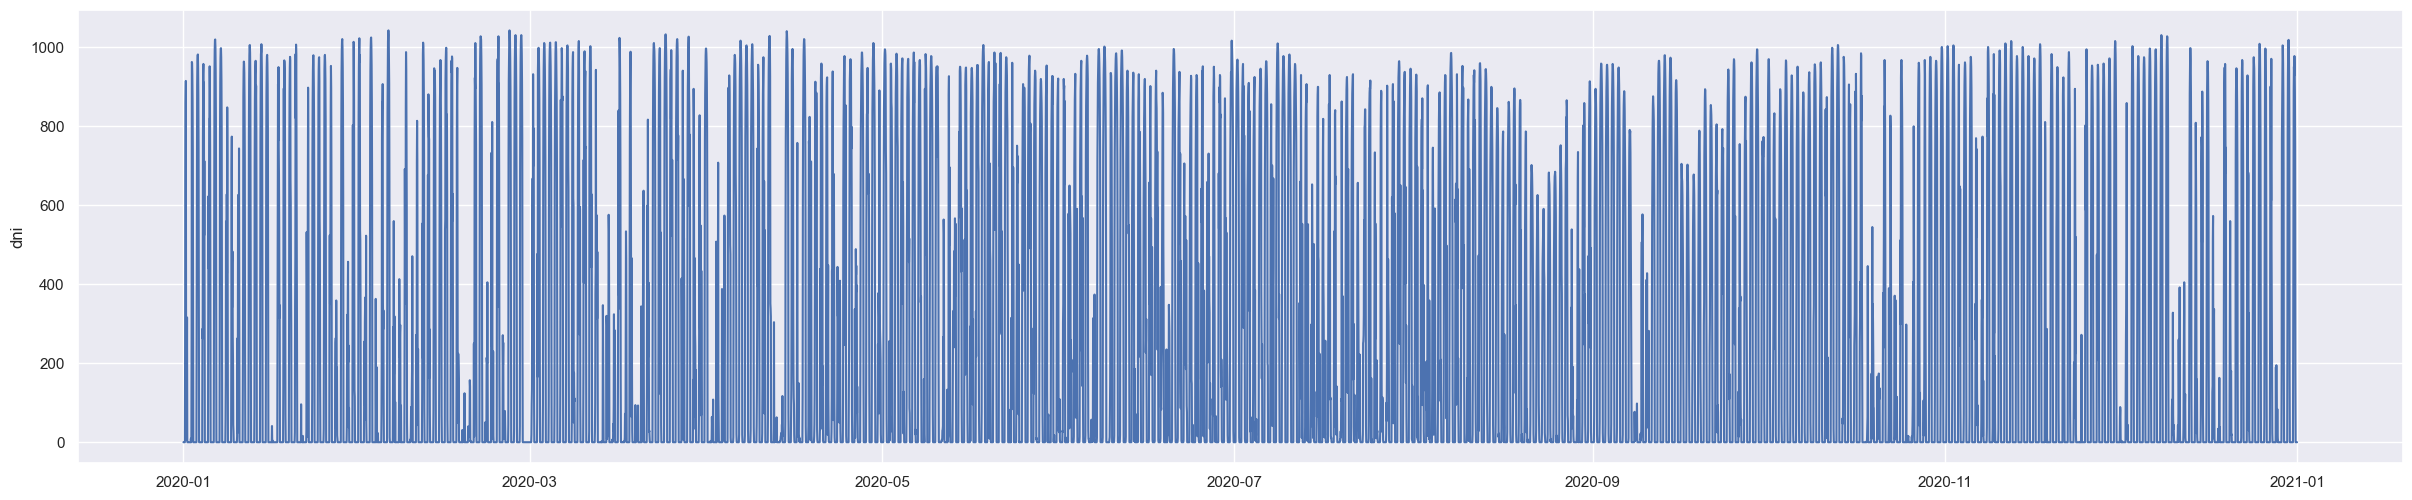

In [35]:
sns.set_theme(style="darkgrid")
plt.figure(dpi=100, figsize=(30,6))
sns.lineplot(data=weather.dni)

<AxesSubplot:ylabel='ghi'>

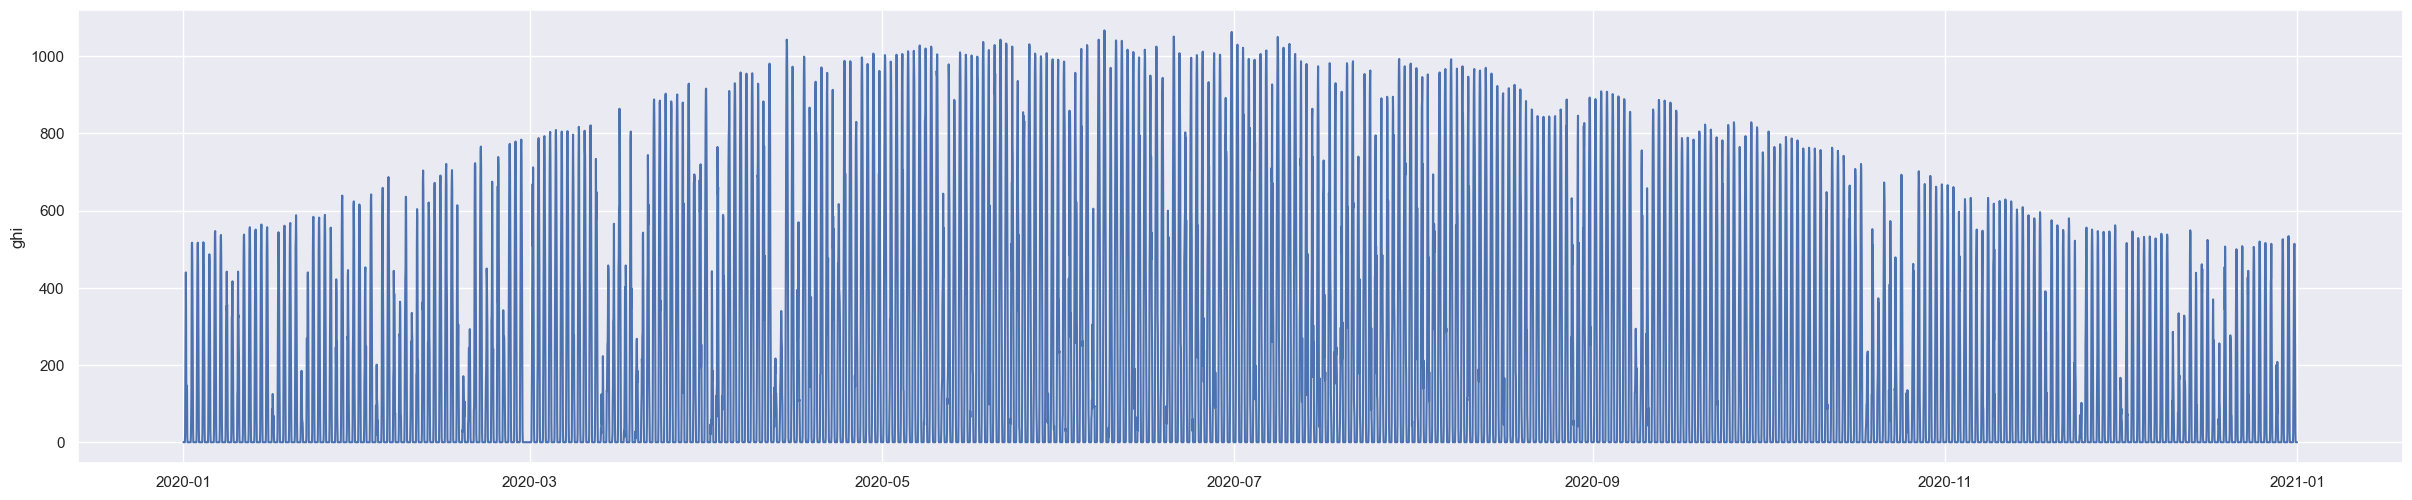

In [36]:
sns.set_theme(style="darkgrid")
plt.figure(dpi=100, figsize=(30,6))
sns.lineplot(data=weather.ghi)

<AxesSubplot:ylabel='dhi'>

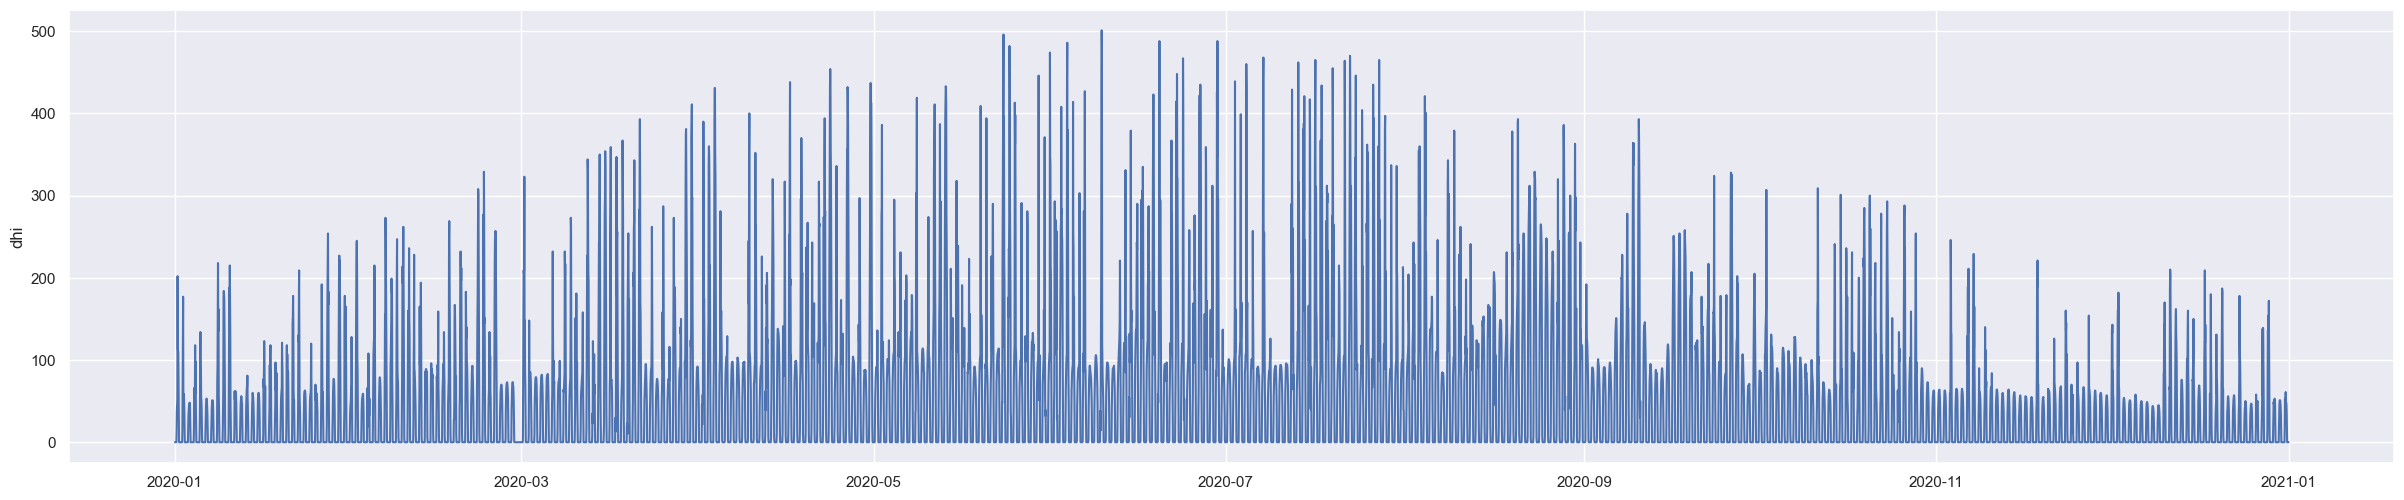

In [37]:
sns.set_theme(style="darkgrid")
plt.figure(dpi=100, figsize=(30,6))
sns.lineplot(data=weather.dhi)

In [26]:
system = PVSystem(
                  module_parameters=sandia_module,
                  inverter_parameters=cec_inverter,
                  temperature_model_parameters=temperature_model_parameters)
mc = ModelChain(system, location, transposition_model='perez', solar_position_method='nrel_numpy',
                orientation_strategy='south_at_latitude_tilt',
               losses_model = 'pvwatts')

In [27]:
mc.run_model(weather)

ModelChain: 
  name: None
  orientation_strategy: south_at_latitude_tilt
  clearsky_model: ineichen
  transposition_model: perez
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: pvwatts_losses

<AxesSubplot:>

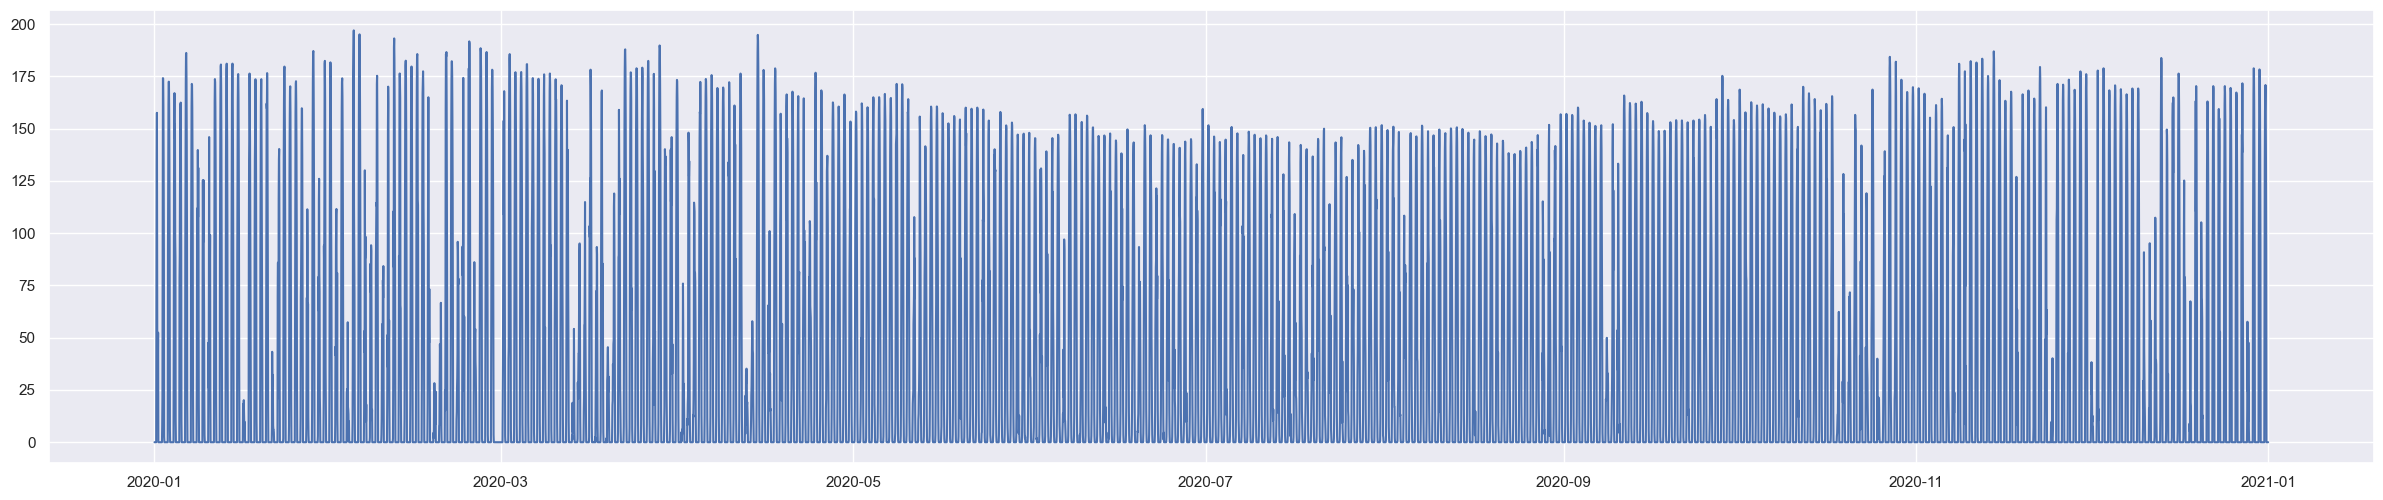

In [41]:
# 没考虑温度和风速的变化
sns.set_theme(style="darkgrid")
plt.figure(dpi=100, figsize=(30,6))
sns.lineplot(data=mc.ac)

In [28]:

pv = mc.ac
#actual_pv = pv.to_csv('actual_pv.csv')

In [29]:
print(type(pv))

<class 'pandas.core.series.Series'>


In [47]:
# solar_position = pvlib.solarposition.spa_python(time=Times,
#                                latitude=lat,
#                                longitude=lon,
#                                altitude=0,
#                                pressure=101325,
#                                temperature=12, 
#                                delta_t=67.0, 
#                                atmos_refract=None,
#                                how='numpy', 
#                                numthreads=4)

In [48]:
# e = pvlib.irradiance.get_extra_radiation(datetime_or_doy=Times,
#                                      solar_constant=1366.1,
#                                      method='spencer',
#                                      epoch_year=2020)

In [49]:
# POA_irradiance = pvlib.irradiance.get_total_irradiance(
#         surface_tilt=38.25,
#         surface_azimuth=180,
#         dni=weather['dni'],
#         ghi=weather['ghi'],
#         dhi=weather['dhi'],
#         solar_zenith=solar_position['apparent_zenith'],
#         solar_azimuth=solar_position['azimuth'],
#         dni_extra=e,
#         airmass=relative_airmass,
#         model='perez',
#         model_perez='allsitescomposite1990')

In [50]:
# sns.set_theme(style="darkgrid")
# plt.figure(dpi=100, figsize=(30,6))
# sns.lineplot(data=POA_irradiance.poa_global)

In [51]:
#print(POA_irradiance)

In [30]:
# 构建一个新的画图dataframe
weather['ac'] = mc.ac

In [31]:
weather.head()

,dhi,dni,ghi,temp_air,wind_speed,ac
2004-01-01 00:30:00-07:00,0.0,0.0,0.0,0.0,3.0,-0.075
2004-01-01 01:30:00-07:00,0.0,0.0,0.0,0.0,3.0,-0.075
2004-01-01 02:30:00-07:00,0.0,0.0,0.0,0.0,2.8,-0.075
2004-01-01 03:30:00-07:00,0.0,0.0,0.0,0.0,2.6,-0.075
2004-01-01 04:30:00-07:00,0.0,0.0,0.0,0.0,2.4,-0.075


In [32]:
print(weather)

                           dhi  dni  ghi  temp_air  wind_speed     ac
2004-01-01 00:30:00-07:00  0.0  0.0  0.0       0.0         3.0 -0.075
2004-01-01 01:30:00-07:00  0.0  0.0  0.0       0.0         3.0 -0.075
2004-01-01 02:30:00-07:00  0.0  0.0  0.0       0.0         2.8 -0.075
2004-01-01 03:30:00-07:00  0.0  0.0  0.0       0.0         2.6 -0.075
2004-01-01 04:30:00-07:00  0.0  0.0  0.0       0.0         2.4 -0.075
...                        ...  ...  ...       ...         ...    ...
1999-12-31 19:30:00-07:00  0.0  0.0  0.0       2.0         2.1 -0.075
1999-12-31 20:30:00-07:00  0.0  0.0  0.0       1.0         2.4 -0.075
1999-12-31 21:30:00-07:00  0.0  0.0  0.0       0.0         2.7 -0.075
1999-12-31 22:30:00-07:00  0.0  0.0  0.0       0.0         2.9 -0.075
1999-12-31 23:30:00-07:00  0.0  0.0  0.0       0.0         3.0 -0.075

[8760 rows x 6 columns]


In [33]:
weather.to_csv('weather.csv')

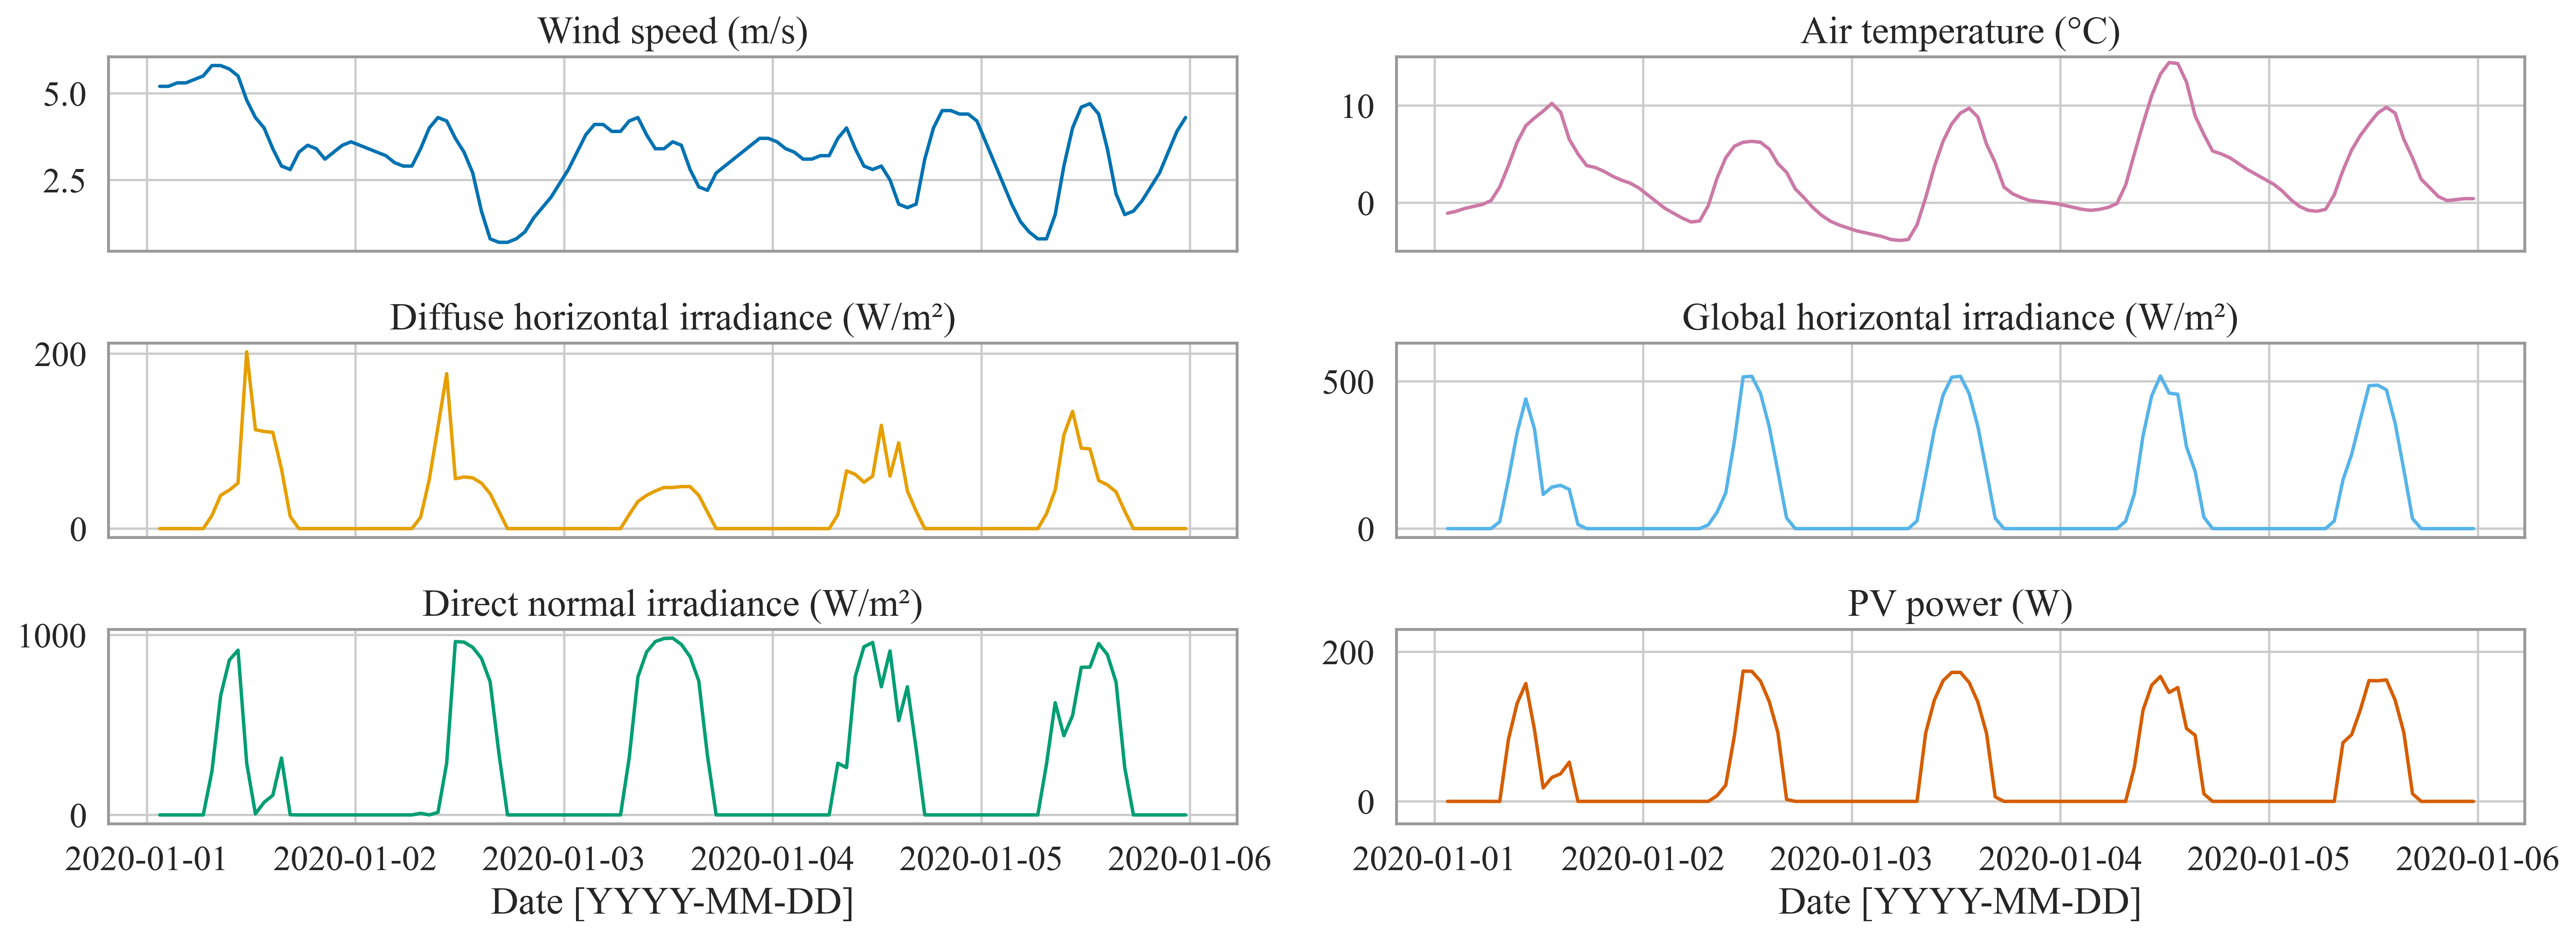

In [57]:
w = weather.iloc[1:120,:]

# sns.set(palette="muted",style="whitegrid",color_codes=True)
sns.set(style="whitegrid", color_codes=True,font_scale=1.4,font="Times New Roman")
# sns.set_style({'axes.linewidth':0.1, 
#                'axes.edgecolor':'black',
#                'xtick.direction': 'out',
#                'xtick.major.size': 4.0,
#                'ytick.direction': 'out',
#                'ytick.major.size': 1.0,
#                'axes.facecolor':'white',
#                'gird.color': '.8',
#                'grid.linestyle': '-',
#                'grid.linewidth': 0.2
#               })

def cm2inch(value):
    return value/2.54


sns.set_style({'axes.edgecolor':'#999999'})


f, axes = plt.subplots(3,2, figsize=(16,6),dpi=500,sharex=True)
axes[1,1].set_ylim(-30,630)
axes[2,1].set_ylim(-30,230)
axes[0,1].set_ylim(-5,15)

axes[0,0].set_title("Wind speed (m/s)")
axes[0,1].set_title("Air temperature (\N{DEGREE SIGN}C)")
axes[1,0].set_title("Diffuse horizontal irradiance (W/m\N{SUPERSCRIPT TWO})")
axes[1,1].set_title("Global horizontal irradiance (W/m\N{SUPERSCRIPT TWO})")
axes[2,0].set_title("Direct normal irradiance (W/m\N{SUPERSCRIPT TWO})")
axes[2,1].set_title("PV power (W)")


axes[2,0].set_xlabel("Date [YYYY-MM-DD]")
axes[2,1].set_xlabel("Date [YYYY-MM-DD]")
#f, axes = plt.subplots(3,2, figsize=(cm2inch(1.8),cm2inch(0.8)),dpi=500,sharex=True)
sns.lineplot(x=w.index,y=w['wind_speed'].values,ax=axes[0,0],color='#0072B2')
sns.lineplot(x=w.index,y=w['temp_air'].values,ax=axes[0,1],color='#CC79A7')
sns.lineplot(x=w.index,y=w['dhi'].values,ax=axes[1,0],color='#E69F00')
sns.lineplot(x=w.index,y=w['ghi'].values,ax=axes[1,1],color='#56B4E9')
sns.lineplot(x=w.index,y=w['dni'].values,ax=axes[2,0],color='#009E73')
sns.lineplot(x=w.index,y=w['ac'].values,ax=axes[2,1],color='#D55E00')

plt.tight_layout()
plt.savefig('Visualization.pdf')